<a href="https://colab.research.google.com/github/ElenaMakarova-ctrl/ETL-news/blob/main/%D0%9D%D0%9E%D0%92%D0%9E%D0%A1%D0%A2%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk import tokenize
import seaborn as sns
import nltk
nltk.download('stopwords')
!pip install nltk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/My Drive/fakenews.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/fakenews.csv'
with open(file_path, 'r') as file:
    data = file.read()

In [ ]:
data = pd.read_csv('/content/drive/My Drive/fakenews.csv')
data.head(5)

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


<Axes: xlabel='label'>

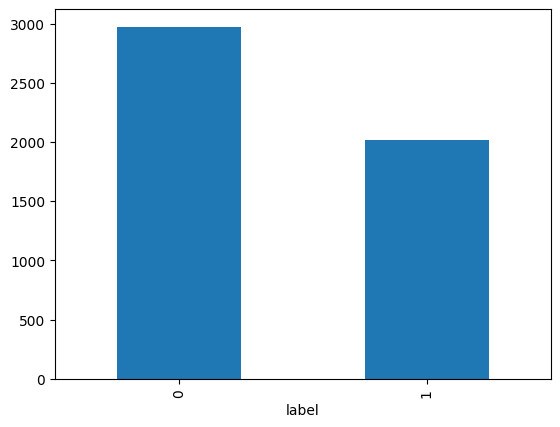

In [ ]:
label_counts = data['label'].value_counts()
label_counts.plot.bar()

In [ ]:
words = ' '.join([text for text in data.text])

tk = tokenize.WhitespaceTokenizer()

token_sentence = tk.tokenize(words)

In [ ]:
def freq_gen(text, text_column, n):
    words = ' '.join([text for text in text[text_column]])

    tk = tokenize.WhitespaceTokenizer()
    token_sentence = tk.tokenize(words)

    frequence = nltk.FreqDist(token_sentence)


    df_frequence = pd.DataFrame({
        "Words": list(frequence.keys()),
        "Frequence": list(frequence.values())
    })

    top_words = df_frequence.nlargest(columns='Frequence', n=n)

    plt.figure(figsize=(10,8))
    plt.title('Commmon Words in Text')
    #sns.barplot(top_words, x='Words', y='Frequence', color='purple')
    sns.barplot(top_words, y="Words", x="Frequence")
    sns.barplot(x='Words', y='Frequence', data=top_words, palette='husl')




<ipython-input-8-f7cd23c5d9a7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Words', y='Frequence', data=top_words, palette='husl')


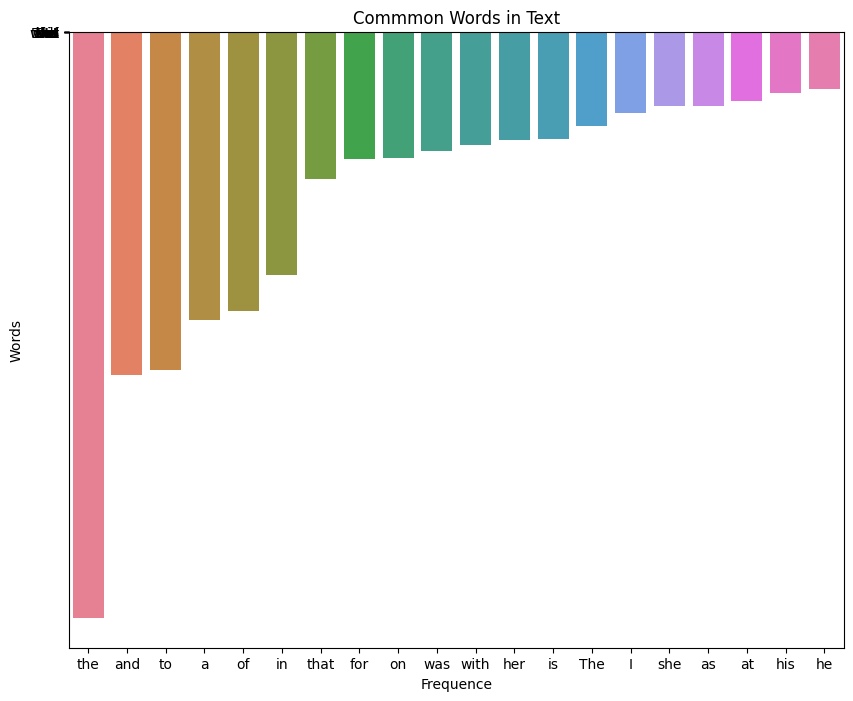

In [ ]:
freq_gen(data, 'text', 20)

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:

from string import punctuation

punctuation_list = list()

for p in punctuation:
    punctuation_list.append(p)

stopwords_punctuation = stop_words + punctuation_list

In [ ]:
data['text_1'] = data['text'].str.lower()

In [ ]:
tk = tokenize.WordPunctTokenizer()

processed_texts = list()

for text in data['text_1']:
    new_text = list()

    tokenize_text = tk.tokenize(text)

    for word in tokenize_text:
        if word not in stopwords_punctuation:
            new_text.append(word)

    processed_texts.append(' '.join(new_text))

In [ ]:
data['text_1'] = processed_texts
data.head()

,text,label,text_1
0,Get the latest from TODAY Sign up for our news...,1,get latest today sign newsletter one ever trul...
1,2d Conan On The Funeral Trump Will Be Invited...,1,2d conan funeral trump invited conan tbs
2,It’s safe to say that Instagram Stories has fa...,0,’ safe say instagram stories far surpassed com...
3,Much like a certain Amazon goddess with a lass...,0,much like certain amazon goddess lasso heights...
4,At a time when the perfect outfit is just one ...,0,time perfect outfit one click away high demand...


<ipython-input-8-f7cd23c5d9a7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Words', y='Frequence', data=top_words, palette='husl')


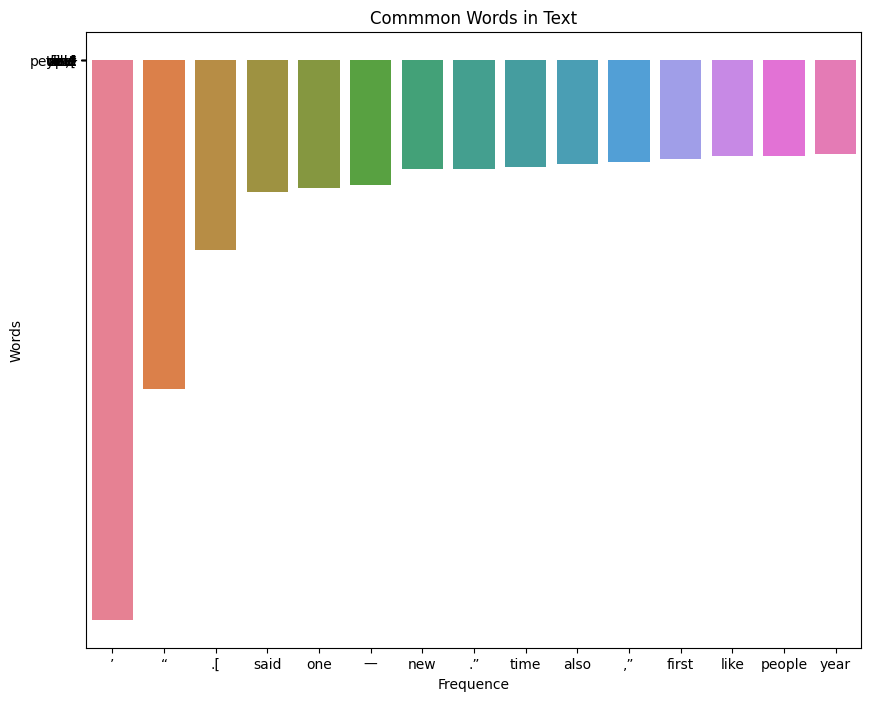

In [ ]:
freq_gen(data, 'text_1', 15)

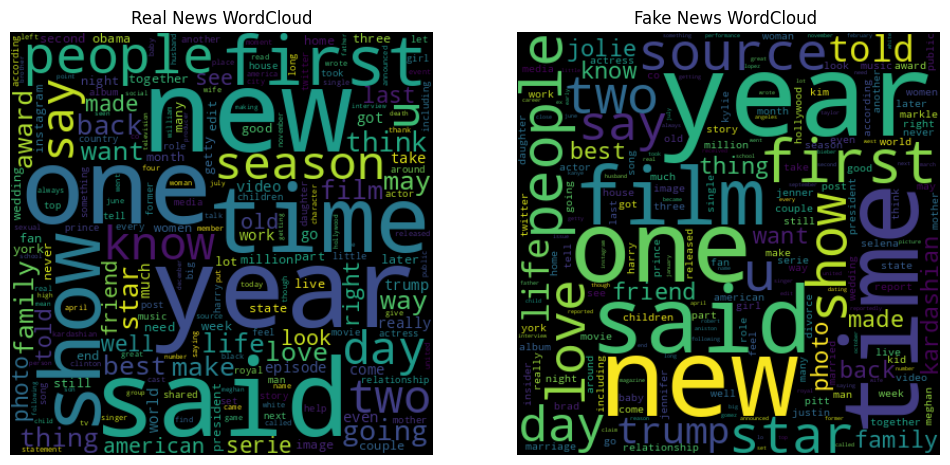

In [ ]:

from wordcloud import WordCloud


words_1 = ' '.join([text for text in data[data['label']==0]['text_1']])
word_cloud_1 = WordCloud(width=400, height=400, collocations=False, max_font_size=110).generate(words_1)


words_2 = ' '.join([text for text in data[data['label']==1]['text_1']])
word_cloud_2 = WordCloud(width=400, height=400, collocations=False, max_font_size=110).generate(words_2)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(word_cloud_1, interpolation='bilinear')
plt.axis("off")
plt.title('Real News WordCloud')

plt.subplot(1, 2, 2)
plt.imshow(word_cloud_2, interpolation='bilinear')
plt.axis("off")
plt.title('Fake News WordCloud ')

plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


def class_text(text, text_column, label_column):
    vectorize = CountVectorizer()

    bag_of_words = vectorize.fit_transform(text[text_column])

    text_train, text_test, label_train, label_test = train_test_split(
        bag_of_words, text[label_column], random_state=42)


    logistic_reg = LogisticRegression(solver='liblinear', max_iter=200)

    logistic_reg.fit(text_train, label_train)

    return logistic_reg.score(text_test, label_test)

In [ ]:
print('Prediction accuracy - text column: ' + '\t' + str(class_text(data, 'text', 'label'))
+ '\nPrediction accuracy - text_1 column: ' + '\t' + str(class_text(data, 'text_1', 'label')))

Prediction accuracy - text column: 	0.7658380112269446
Prediction accuracy - text_1 column: 	0.7738572574178028
